In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

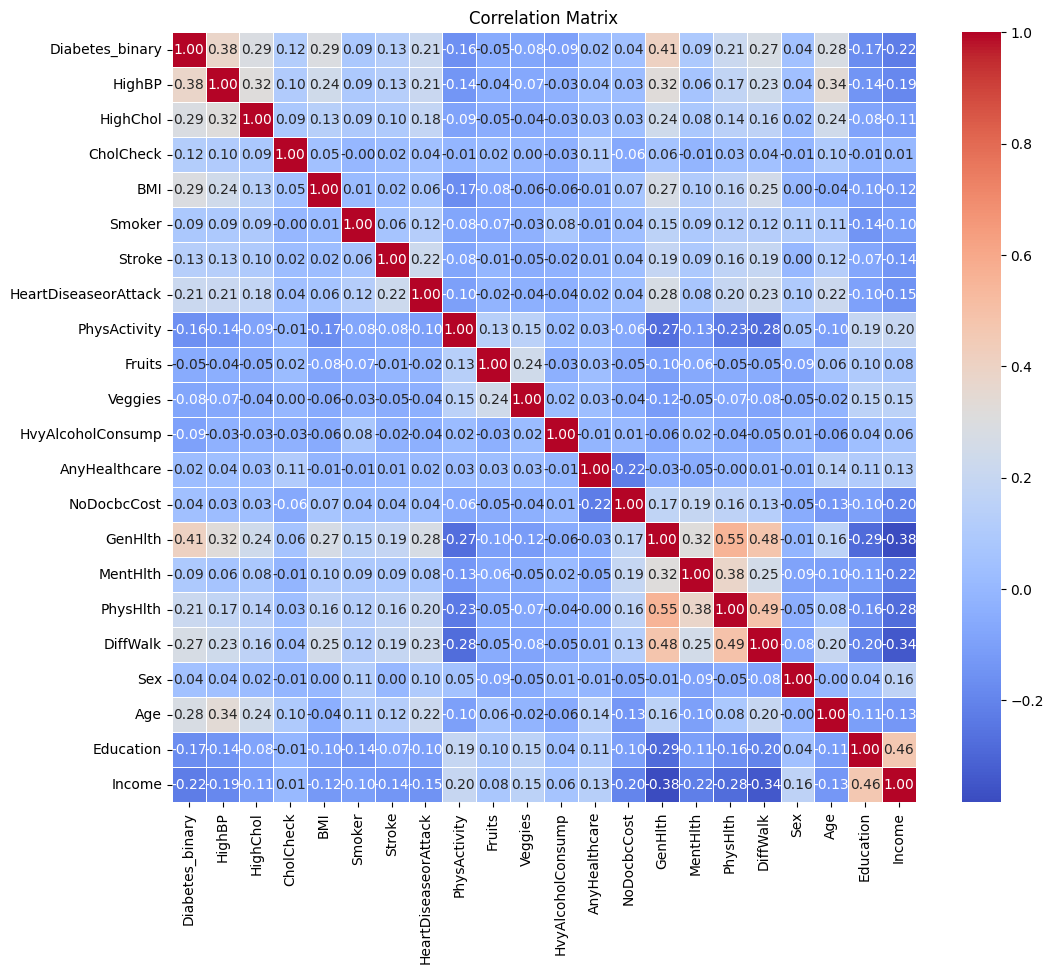

In [3]:
df = pd.read_csv("../Data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
df = pd.read_csv("../Data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

x = df.drop('Diabetes_binary', axis=1) #All Featutes - Target Var
y = df['Diabetes_binary'] # Target Var
scaler = StandardScaler()
x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
# Step 1: Coarse search over larger parameter space (C and kernel)
param = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

tuning = GridSearchCV(SVC(), param, scoring='accuracy')
tuning.fit(x_train, y_train)
best_param = tuning.best_params_

In [ ]:
# Step 2: Fine-tune based on best kernel type
if best_param['kernel'] == 'poly':
    param_grid_stage2 = {'gamma': ['scale', 'auto'], 'degree': [2, 3, 4]}
else:
    param_grid_stage2 = {'gamma': ['scale', 'auto']}
param_grid_stage2.update({'C': [best_param['C']], 'kernel': [best_param['kernel']]})

grid_search_stage2 = GridSearchCV(SVC(), param_grid_stage2, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_stage2.fit(x_train, y_train)
best_model = grid_search_stage2.best_estimator_

In [ ]:
y_pred = best_model.predict(x_test)
print("Test Set Evaluation:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

In [ ]:
# Grid Search Scores Heatmap
scores = tuning.cv_results_['mean_test_score']
scores = scores.reshape(len(param['C']), len(param['kernel']))

plt.figure(figsize=(8, 6))
sns.heatmap(scores, annot=True, xticklabels=param['kernel'], yticklabels=param['C'], cmap="YlGnBu")
plt.xlabel('Kernel')
plt.ylabel('C')
plt.title('Grid Search Accuracy Scores')
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix on Test Data")
plt.show()

# Learning Curve
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(best_model, x_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, label="Training Score")
plt.plot(train_sizes, test_scores_mean, label="Validation Score")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend()
plt.show()

Test Set Evaluation:
              precision    recall  f1-score   support

         0.0       0.78      0.69      0.73      7090
         1.0       0.72      0.80      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139

Accuracy: 0.7481434330575005


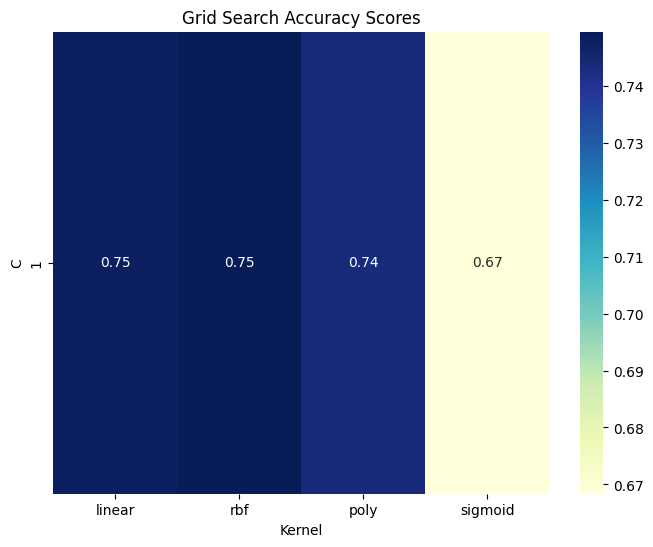

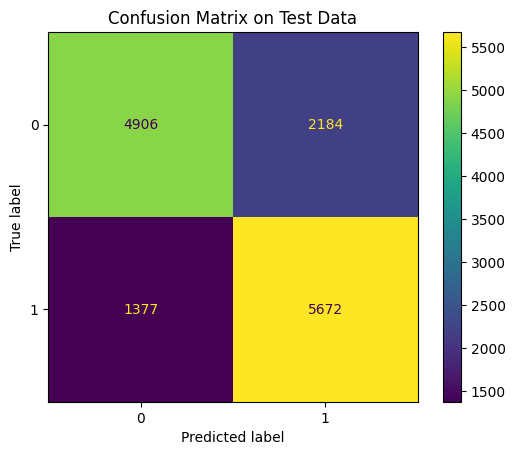

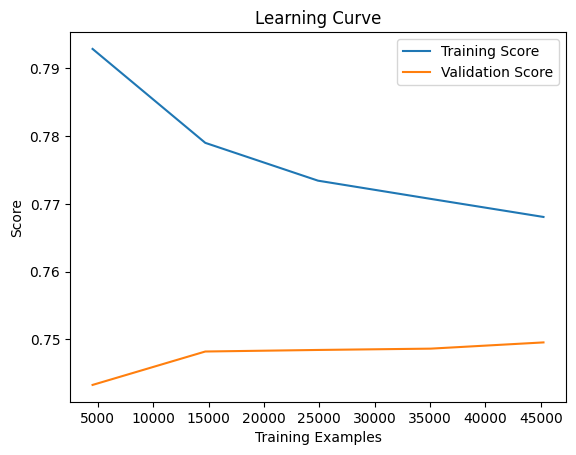

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../Data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
# Split the dataset into features (X) and target (y)
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'C': [1],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Set Evaluation:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Grid Search Scores Heatmap
scores = grid_search.cv_results_['mean_test_score']
scores = scores.reshape(len(param_grid['C']), len(param_grid['kernel']))

plt.figure(figsize=(8, 6))
sns.heatmap(scores, annot=True, xticklabels=param_grid['kernel'], yticklabels=param_grid['C'], cmap="YlGnBu")
plt.xlabel('Kernel')
plt.ylabel('C')
plt.title('Grid Search Accuracy Scores')
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix on Test Data")
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, label="Training Score")
plt.plot(train_sizes, test_scores_mean, label="Validation Score")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend()
plt.show()


In [ ]:
df = pd.read_csv("../Data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

# Calculate correlations with the target variable
correlations = []
for column in df.columns:
    correlation = df[column].corr(df["Diabetes_binary"])
    correlations.append(correlation)
correlations = np.abs(np.array(correlations))
sorted_most_correlated = df.columns[correlations.argsort()[::-1]][1:]

# Select top 15 most correlated features
top_features = sorted_most_correlated[:15]
print("Top 15 features:", top_features)

# Use only the top 15 features for X
x = df[top_features]
y = df['Diabetes_binary']  # Target variable
scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Top 15 features: Index(['GenHlth', 'HighBP', 'BMI', 'HighChol', 'Age', 'DiffWalk', 'Income',
       'PhysHlth', 'HeartDiseaseorAttack', 'Education', 'PhysActivity',
       'Stroke', 'CholCheck', 'HvyAlcoholConsump', 'MentHlth'],
      dtype='object')


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Instantiate the SVC model with C=0.1, rbf kernel, and default gamma='scale'
model = SVC(C=0.1, kernel='rbf', gamma='scale')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Test Set Evaluation:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Test Set Evaluation:
              precision    recall  f1-score   support

         0.0       0.78      0.69      0.73      7090
         1.0       0.72      0.80      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139

Accuracy: 0.745880189546644


Test Set Evaluation:
              precision    recall  f1-score   support

         0.0       0.78      0.69      0.73      7090
         1.0       0.72      0.80      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139

Accuracy: 0.745880189546644


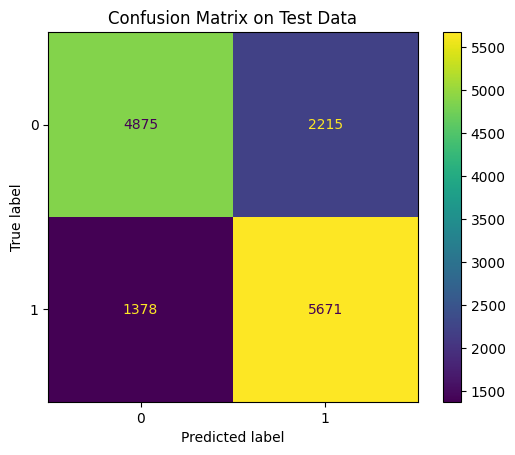

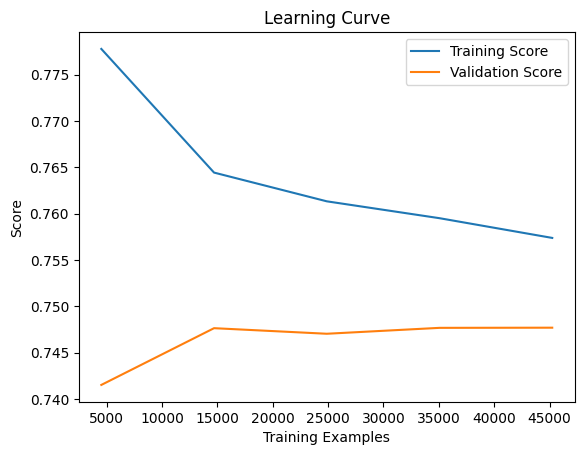

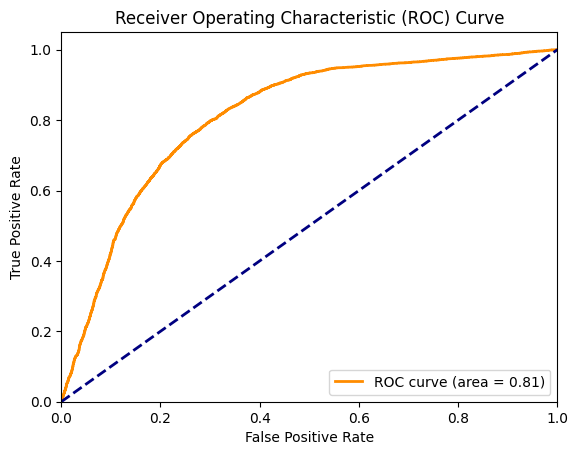

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, roc_curve, auc
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

# Instantiate the SVC model with C=0.1, rbf kernel, and default gamma='scale'
model = SVC(C=0.1, kernel='rbf', gamma='scale')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Test Set Evaluation:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix on Test Data")
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, label="Training Score")
plt.plot(train_sizes, test_scores_mean, label="Validation Score")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend()
plt.show()

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, model.decision_function(x_test))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

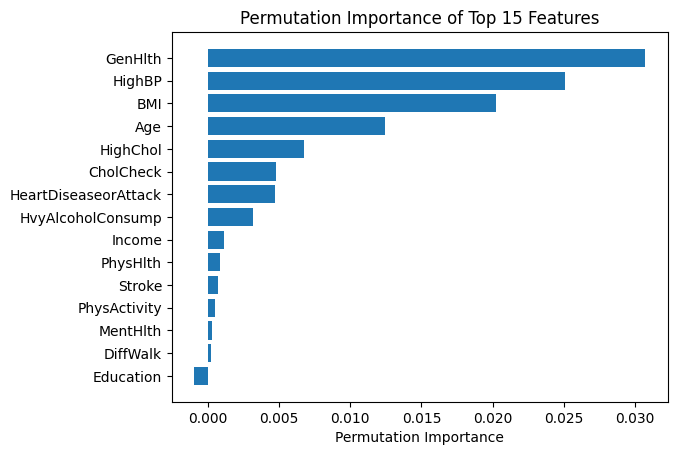

In [ ]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(model, x_test, y_test)

# Sort features by mean importance
sorted_idx = perm_importance.importances_mean.argsort()

# Plot permutation importance
plt.barh(top_features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Permutation Importance of Top 15 Features")
plt.show()